# Repaso Módulo 1 - Optimización.
---

## Primer punto. Optimización de funciones escalares usando `sympy`.

**Enunciado.** Calcular **las dimensiones** del rectángulo de área máxima que puede inscribirse dentro de un semicírculo de radio 2.

Note que **las dimensiones** son base $b = 2x$ y altura $h = y$. Ver la siguiente figura.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

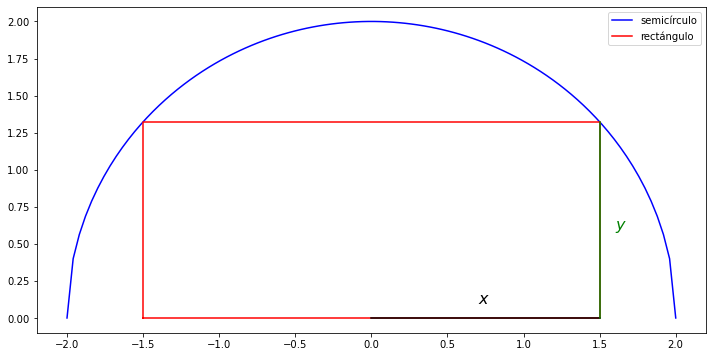

In [2]:
x = np.linspace(-2, 2, 100)
y = np.sqrt(4 - x**2)

xr = [-1.5, -1.5, 1.5, 1.5, -1.5]
yr = [0, np.sqrt(4 - 1.5**2), np.sqrt(4 - 1.5**2), 0, 0]

xx = [0, 1.5]
yx = [0, 0]

xy = [1.5, 1.5]
yy = [0, np.sqrt(4 - 1.5**2)]

plt.figure(figsize = (12, 6))
plt.plot(x, y, 'b', label = 'semicírculo')
plt.plot(xr, yr, 'r', label = 'rectángulo')
plt.plot(xx, yx, 'k')
plt.plot(xy, yy, 'g')
plt.text(0.7, 0.1, '$x$', fontsize = 16)
plt.text(1.6, 0.6, '$y$', fontsize = 16, color = 'g')
plt.legend(loc = 'best')
plt.show()

**Punto 1.** Encuentre el área del rectángulo en función de la variable $x$, $A_R(x)$. También provea el dominio de la función para que tenga sentido.

Realice este punto usando fórmulas en $\LaTeX$, en celdas Markdown.

### Datos que conozco

$$ r=2$$ 

Nota: r sera mi h de pitogar y el puedo resolverlo como si fuera la mitad de un rectangulo es decir

$$ Ac= xy $$

Luego, puedo despejar pitagoras: 

$$ r^2=x^2+y^2$$ 

Sistiuyo para y

$$ y=\sqrt{-x^2+4}$$

Sistiuto en la formula 

$$ Ac=x(\sqrt{-x^2+4}) $$

Ahora derivo y para encuntrar su punto critico


**Punto 2.** Usando `sympy` maximice la función $A_R(x)$ en su dominio.

In [3]:
import sympy as sp
sp.var("x")
sp.var("y")
Area=x*y
Diagonal=x**2+y**2-2**2
y_x=sp.solve(Diagonal, y)[1]
Area_x=Area.subs(y, y_x)
dA=sp.diff(Area_x)
pc=sp.solve(dA, x)[1]
op=y_x.subs(x, pc)
op

sqrt(2)

**Punto 3.** ¿Cuáles son las dimensiones $b$ y $h$ del rectángulo resultante?

In [6]:
Base=2*op
H= op

Base, H

(2*sqrt(2), sqrt(2))

In [22]:
Base*H


4

## Segundo punto. Programación lineal.

**Enunciado.** Considere un restaurante que abre los siete días de la semana. Con base en la experiencia, el mínimo número de trabajadores necesarios en cada día de la semana es:

Cada trabajador labora cinco días consecutivos, y luego descansa dos, repitiendo este patrón indefinidamente. Se debe minimizar la cantidad de trabajadores totales en el restaurante.

*Definición de variables*: enumeramos los días del uno al siete (Lunes - 1, Martes - 2, ..., Domingo - 7). Sea $x_i$ el número de trabajadores que empieza su turno de cinco días el día $i$.

**Punto 1.** Escriba la función a minimizar junto con las restricciones, explicando detalladamente cada paso (usando fórmulas en LaTeX, en celdas Markdown). Además escriba el problema en la forma 
\begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}
\end{equation}

proporcionando $\boldsymbol{c}$, $\boldsymbol{A}$ y $\boldsymbol{b}$ ($\boldsymbol{A}_{eq}$ y $\boldsymbol{b}_{eq}$, de ser necesario).

In [2]:
import pandas as pd
import scipy.optimize as opt

In [3]:
df = pd.DataFrame(columns=['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'], index = ['Num_trabajadores'])
df.loc['Num_trabajadores', :] = [14, 13, 15, 16, 19, 18, 11]
df

,Lunes,Martes,Miercoles,Jueves,Viernes,Sábado,Domingo
Num_trabajadores,14,13,15,16,19,18,11


* Criterio:Minimizar el número de trabajadores por dia

* Variables:

  $$Lunes----x_1$$
  $$Martes---x_2$$
  $$Miercoles---x_3$$
  $$Juves---x_4$$
  $$Viernes---x_5$$
  $$Sabado---x_6$$
  $$Domingo---x_7$$

* Funcion de costo:

  $$C= x_1+x_2+x_3+x_4+x_5+x_6+x_7$$

* Restricciones:

  * Tienen que ser mayores a la cantidad que se dice 




**Punto 2.** Resuelva el problema utilizando la función `linprog`. ¿Cuántos trabajadores son necesarios en total?

In [24]:
import numpy as np
import scipy.optimize as opt
c=np.array([1, 
           1,
           1,
           1,
           1,
           1,
           1])
Aub= np.array([
    [-1, -1, -1, -1, -1, 0, 0], 
    [0, -1, -1, -1, -1, -1, 0], 
    [0, 0, -1, -1, -1, -1, -1], 
    [-1, 0, 0, -1, -1, -1, -1], 
    [-1, -1, 0, 0, -1, -1, -1],
    [-1, -1, -1, 0, 0, -1, -1], 
    [-1, -1, -1, -1, 0, 0, -1]

]) 

bub=np.array([
    -14, 
    -13,
    -15, 
    -16, 
    -19, 
    -18, 
    -11                      
])

opt.linprog(c, Aub, bub)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 22.0
              x: [ 7.000e+00  0.000e+00  3.000e+00  0.000e+00  4.000e+00
                   7.000e+00  1.000e+00]
            nit: 7
          lower:  residual: [ 7.000e+00  0.000e+00  3.000e+00  0.000e+00
                              4.000e+00  7.000e+00  1.000e+00]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  3.333e-01
                              0.000e+00  0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf        inf        inf
                                    inf        inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  1.000e+00  0.000e+00  3.000e+00
                              0.000e+00  0.0

## Tercer punto. Regresión lineal.

**Enunciado**. El archivo `Salarios_minimos.csv` contiene datos simplificados de los salarios mínimos desde 1986 a la fecha. La primer columna corresponde a los años, la segunda a dichos salarios. La información completa se encuentra en

https://idconline.mx/laboral/salarios-minimos/salarios-minimos-1986-2007.

**Punto 1.** Importar los datos en un DataFrame de pandas.

**Punto 2.** Usando los años como variable independiente $x$ y los salarios mínimos como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3. Es decir:

$$ y_1 = \beta_0 + \beta_1 x $$
$$ y_2 = \beta_0 + \beta_1 x + \beta_2 x^2$$
$$ y_3 = \beta_0 + \beta_1 x + \beta_2 x^2 + + \beta_3 x^3 $$



Mostrar en un solo gráfico los datos del archivo contra los años, y los polinomios ajustados.

Graficar la suma de los errores al cuadrado (RSS) contra el número de términos. ¿Cuál es el polinomio que mejor se ajusta?

**Punto 3.** Con los polinomios ajustados en el punto anterior, estime el salario mínimo en el año 2019 y compare con el dato real 102.68.

¿Cuál polinomio estima mejor este dato? ¿Es el polinomio que mejor se ajusta? Concluya.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
datos=pd.read_csv("Salarios_minimos.csv")
datos



,Periodo,Salario,Periodo 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,1988.25,8.00,0.00,NaN,NaN,NaN,1988
1,1989.00,8.64,1.00,NaN,NaN,NaN,1988
2,1989.50,9.16,1.50,NaN,NaN,NaN,1988
3,1990.00,10.08,2.00,NaN,NaN,NaN,1988
4,1990.84,11.90,2.84,NaN,NaN,NaN,1988
5,1991.84,13.33,3.84,NaN,NaN,NaN,1988
6,1993.00,14.27,5.00,NaN,NaN,NaN,1988
7,1994.00,15.27,6.00,NaN,NaN,NaN,1988
8,1995.00,16.34,7.00,NaN,NaN,NaN,1988
9,1995.30,18.30,7.30,NaN,NaN,NaN,1988


In [49]:
x=datos["Periodo 2"]
y=datos["Salario"]

### Para $x$

In [55]:
#Hacer la regresion lineal
n=len(y)
ones=np.ones([n,1])
x_factor=np.reshape(x,[n,1])
X=np.hstack((ones,x_factor)) 
y_vector=np.reshape(y, [n,1]) #y pasa a ser columna de 1 y x

n,p=X.shape #n filas, p paramertos
beta=np.random.rand(p) # empezar a encontrar valores

def funcion(beta, X, y): 
    beta=np.reshape(beta, [p,1])
    y_pre=X@beta
    error=y_pre-y
    rss=error.T@error
    return rss[0, 0]
rss=opt.minimize(funcion, beta, args=(X, y_vector))
rss

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 281.8567395263168
        x: [ 3.785e+00  2.525e+00]
      nit: 5
      jac: [ 0.000e+00  3.815e-06]
 hess_inv: [[ 5.121e-02 -2.576e-03]
            [-2.576e-03  1.818e-04]]
     nfev: 21
     njev: 7

### Para $x^2$

In [93]:
x=datos["Periodo 2"]
y=datos["Salario"]
x2=x**2
x2

0       0.0000
1       1.0000
2       2.2500
3       4.0000
4       8.0656
5      14.7456
6      25.0000
7      36.0000
8      49.0000
9      53.2900
10     64.0000
11     68.8900
12     81.0000
13    100.0000
14    121.0000
15    144.0000
16    169.0000
17    196.0000
18    225.0000
19    256.0000
20    289.0000
21    324.0000
22    361.0000
23    400.0000
24    441.0000
25    484.0000
26    529.0000
27    576.0000
28    625.0000
29    676.0000
30    729.0000
31    784.0000
32    841.0000
33    900.0000
Name: Periodo 2, dtype: float64

### El gráfico no sé como hacerlo

In [96]:
#Hacer la regresion lineal
n=len(x)
ones=np.ones([n,1])
x_factor=np.reshape(x,[n,1])
x_factor_2=np.reshape(x2,[n,1])
X=np.hstack((ones,x_factor, x_factor_2)) 
y_vector=np.reshape(y, [n,1]) #y pasa a ser columna de 1 y x

n,p=X.shape #n filas, p paramertos
beta=np.random.rand(p) # empezar a encontrar valores

def funcion(beta, X, y): 
    beta=np.reshape(beta, [p,1])
    y_pre=X@beta
    error=y_pre-y
    rss=error.T@error
    return rss[0, 0]
rss=opt.minimize(funcion, beta, args=(X, y_vector))
rss

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 261.3099109919554
        x: [ 5.300e+00  2.200e+00  1.097e-02]
      nit: 9
      jac: [ 0.000e+00 -3.815e-06  0.000e+00]
 hess_inv: [[ 1.071e-01 -1.456e-02  4.047e-04]
            [-1.456e-02  2.753e-03 -8.681e-05]
            [ 4.047e-04 -8.681e-05  2.931e-06]]
     nfev: 52
     njev: 13

In [48]:
RSE= np.sqrt(rss.fun/(n-2))
TSS=np.sum((y-np.mean(y))**2)
R2=1-(rss.fun/TSS)
RSE, R2

(5.3585503817565865, 0.9484194613085786)

In [50]:
var_beta=np.linalg.inv(X.T@X)*RSE**2
std_beta=np.sqrt(var_beta.diagonal())
var_beta, std_beta

(array([[ 2.73888869e+09, -2.73504608e+06,  6.82788404e+02],
        [-2.73504608e+06,  2.73121931e+03, -6.81835685e-01],
        [ 6.82788404e+02, -6.81835685e-01,  1.70217632e-04]]),
 array([5.23343930e+04, 5.22610688e+01, 1.30467479e-02]))

In [54]:
t=rss.x/std_beta
p_0=2*(1-stats.t.cdf(np.abs(t[0]), n-2))
p_1=2*(1-stats.t.cdf(np.abs(t[1]), n-2))
p_2=2*(1-stats.t.cdf(np.abs(t[2]), n-2))
t, p_0, p_1, p_2

(array([-0.02605655, -0.01594345,  0.05866007]),
 0.9793740524540839,
 0.9873785000378128,
 0.9535876605597)

### Para $x^3$

In [118]:
x=datos["Periodo 2"]
y=datos["Salario"]
x3=x**3
x3

0         0.000000
1         1.000000
2         3.375000
3         8.000000
4        22.906304
5        56.623104
6       125.000000
7       216.000000
8       343.000000
9       389.017000
10      512.000000
11      571.787000
12      729.000000
13     1000.000000
14     1331.000000
15     1728.000000
16     2197.000000
17     2744.000000
18     3375.000000
19     4096.000000
20     4913.000000
21     5832.000000
22     6859.000000
23     8000.000000
24     9261.000000
25    10648.000000
26    12167.000000
27    13824.000000
28    15625.000000
29    17576.000000
30    19683.000000
31    21952.000000
32    24389.000000
33    27000.000000
Name: Periodo 2, dtype: float64

In [120]:
#Hacer la regresion lineal
n=len(x)
ones=np.ones([n,1])
x_factor=np.reshape(x,[n,1])
x_factor_2=np.reshape(x2,[n,1])
x_factor_3=np.reshape(x3,[n,1])
X=np.hstack((ones,x_factor, x_factor_2, x_factor_3)) 
y_vector=np.reshape(y, [n,1]) #y pasa a ser columna de 1 y x

n,p=X.shape #n filas, p paramertos
beta=np.random.rand(p) # empezar a encontrar valores

def funcion(beta, X, y): 
    beta=np.reshape(beta, [p,1])
    y_pre=X@beta
    error=y_pre-y
    rss=error.T@error
    return rss
rss=opt.minimize(funcion, beta, args=(X, y_vector))
rss

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 258.06819997398634
        x: [ 4.661e+00  2.482e+00 -1.335e-02  5.473e-04]
      nit: 10
      jac: [ 0.000e+00  0.000e+00  0.000e+00 -3.052e-05]
 hess_inv: [[ 8.568e-02 -2.137e-02  1.416e-03 -2.728e-05]
            [-2.137e-02  9.821e-03 -8.025e-04  1.723e-05]
            [ 1.416e-03 -8.025e-04  7.170e-05 -1.622e-06]
            [-2.728e-05  1.723e-05 -1.622e-06  3.795e-08]]
     nfev: 199
     njev: 38

## Cuarto punto. Regresión logística.

**Enunciado**. Ximena vive un poco alejada de la universidad donde estudia y quiere asegurarse de siempre llegar a tiempo. Ha estado registrando la hora a la que sale como minutos relativos a las 7 am. I.e. $x=25$ serían 25 minutos **después** de las 7 am, y $x=-15$ serían 15 minutos **antes** de las 7 am. Además, también registra si llega a tiempo o no. ¿Qué es lo más tarde que puede salir de su casa para tener 70% de probabilidad de llegar a tiempo?



In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
datos=pd.read_csv("puntualidad.csv")
datos

,minutos,a tiempo
0,66.872267,n
1,8.820457,s
2,-1.616632,s
3,38.673966,n
4,2.889735,s
...,...,...
195,61.935480,n
196,-15.436279,s
197,-40.385927,s
198,-15.676668,s


In [128]:
datos["a tiempo"]=datos["a tiempo"].astype("category")
datos["a tiempo"]

0      n
1      s
2      s
3      n
4      s
      ..
195    n
196    s
197    s
198    s
199    s
Name: a tiempo, Length: 200, dtype: category
Categories (2, object): ['n', 's']

In [130]:
datos["num"]=datos["a tiempo"].map({"s":1, "n": 0})

0      0
1      1
2      1
3      0
4      1
      ..
195    0
196    1
197    1
198    1
199    1
Name: num, Length: 200, dtype: category
Categories (2, int64): [0, 1]

In [138]:
y=datos["num"]
x=datos["minutos"]

In [140]:
n=len(y)
ones=np.ones([n, 1])
min=np.reshape(datos["minutos"], [n, 1])
X=np.hstack((ones, min))
y_vector=np.reshape(y, [n, 1])
def prediccion(beta, X): # prediccion
    return 1/(1+np.exp(-X@beta))
def J(beta, X, y): # y va a comparar
    epsilon=1e-45
    n, p=X.shape
    beta=np.reshape(beta,[p, 1])
    y_pred=prediccion(beta, X)
    e=y*np.log(y_pred+epsilon)+(1-y)*np.log(1-y_pred+epsilon)
    return -np.sum(e)
beta=[-10, -.0005]
rrs=opt.minimize(J, beta, args=(X, y_vector))
rrs

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 59.71285501709966
        x: [ 1.437e+00 -7.660e-02]
      nit: 15
      jac: [-4.292e-06  0.000e+00]
 hess_inv: [[ 8.647e-02 -1.846e-03]
            [-1.846e-03  1.074e-04]]
     nfev: 75
     njev: 25